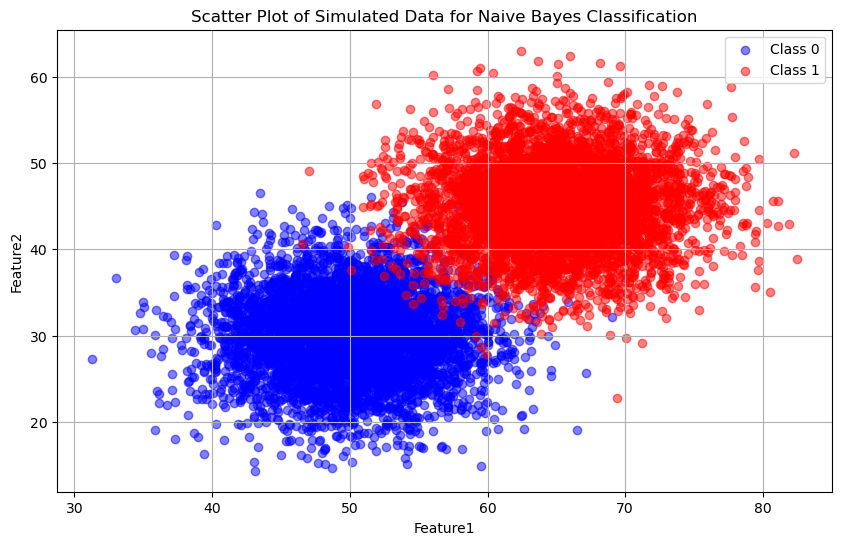

Predicted class for sample [60, 40]: 1


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Parameters for dataset generation
np.random.seed(0)
num_samples_per_class = 5000

# Class 0 (Non-Fraud)
class_0_feature1 = np.random.normal(50, 5, num_samples_per_class)   # mean=50, std=5
class_0_feature2 = np.random.normal(30, 5, num_samples_per_class)   # mean=30, std=5
class_0_labels = np.zeros(num_samples_per_class)

# Class 1 (Fraud)
class_1_feature1 = np.random.normal(65, 5, num_samples_per_class)   # mean=65, std=5
class_1_feature2 = np.random.normal(45, 5, num_samples_per_class)   # mean=45, std=5
class_1_labels = np.ones(num_samples_per_class)

# Combine into a DataFrame
data = pd.DataFrame({
    "Feature1": np.concatenate([class_0_feature1, class_1_feature1]),
    "Feature2": np.concatenate([class_0_feature2, class_1_feature2]),
    "Label": np.concatenate([class_0_labels, class_1_labels])
})
data.to_csv("fraud_or_no_fraud.csv",index=False)
# Split data by class
data_class_0 = data[data["Label"] == 0]
data_class_1 = data[data["Label"] == 1]

# Prior probabilities
prior_class_0 = len(data_class_0) / len(data)
prior_class_1 = len(data_class_1) / len(data)

# Means and variances for each feature conditioned on class
mean_class_0 = data_class_0[["Feature1", "Feature2"]].mean()
mean_class_1 = data_class_1[["Feature1", "Feature2"]].mean()

var_class_0 = data_class_0[["Feature1", "Feature2"]].var()
var_class_1 = data_class_1[["Feature1", "Feature2"]].var()

# Naive Bayes prediction function
def calculate_gaussian_probability(x, mean, var):
    # Gaussian probability density function
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent

def predict_naive_bayes(sample):
    # Calculate likelihoods for Class 0
    likelihood_class_0 = (
        calculate_gaussian_probability(sample[0], mean_class_0["Feature1"], var_class_0["Feature1"]) *
        calculate_gaussian_probability(sample[1], mean_class_0["Feature2"], var_class_0["Feature2"])
    )
    
    # Calculate likelihoods for Class 1
    likelihood_class_1 = (
        calculate_gaussian_probability(sample[0], mean_class_1["Feature1"], var_class_1["Feature1"]) *
        calculate_gaussian_probability(sample[1], mean_class_1["Feature2"], var_class_1["Feature2"])
    )
    
    # Posterior probabilities
    posterior_class_0 = prior_class_0 * likelihood_class_0
    posterior_class_1 = prior_class_1 * likelihood_class_1
    
    # Predict class with higher posterior probability
    return 0 if posterior_class_0 > posterior_class_1 else 1



# Plot data points
plt.figure(figsize=(10, 6))

# Plot Class 0 data points in blue
plt.scatter(data_class_0["Feature1"], data_class_0["Feature2"], color='blue', alpha=0.5, label="Class 0")

# Plot Class 1 data points in red
plt.scatter(data_class_1["Feature1"], data_class_1["Feature2"], color='red', alpha=0.5, label="Class 1")

# Labeling the plot
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Scatter Plot of Simulated Data for Naive Bayes Classification")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Test prediction
sample = [60, 40]  # Example sample with Feature1=60, Feature2=40
predicted_class = predict_naive_bayes(sample)
print(f"Predicted class for sample {sample}: {predicted_class}")
